In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
import requests


In [4]:
banners = []

#get statistics from paimon.moe
for bannerno in range(300009, 300044):
    banner_stats = requests.get(f"https://api.paimon.moe/wish?banner={bannerno}")
    banners.append(banner_stats.json()["pityCount"]["legendary"][1:91])

# populate probability arrays
num_pulls_char = np.sum(banners, axis=0)
sum_char = np.sum(num_pulls_char)
probabilities_char = np.array([val/sum_char for val in num_pulls_char])

num_pulls_std = [45168, 45124, 45600, 44985, 44660, 44563, 44122, 43782, 43396, 42997, 42658, 42369, 42139, 41757, 41402, 41342, 40750, 40490, 40271, 39811, 38727, 39170, 38163, 38260, 38122, 37716, 37756, 37021, 36635, 36153, 35578, 35269, 35073, 35029, 34849, 34267, 33930, 33788, 32980, 32384, 32044, 31822, 31189, 31392, 31205, 30670, 30683, 29950, 29628, 28888, 28373, 28114, 27681, 27881, 27769, 27217, 27243, 26740, 26031, 25832, 24930, 24823, 24725, 25030, 24828, 24737, 24568, 24734, 24051, 23577, 22919, 22375, 22526, 101143, 166253, 207065, 218351, 201912, 165796, 121217, 78667, 45447, 22597, 10095, 3711, 1255, 397, 207, 178, 146]
sum_std = np.sum(num_pulls_std)
probabilities_std = np.array([val/sum_std for val in num_pulls_std])

In [5]:
# simulate trials for char banner with 7 std chars
def simulate_trials(num_trials, max_attempts):
    trial_results = 0
    for trial_idx in range(num_trials):
        attempt = 0
        guarantee = 0
        won = 0
        while attempt <= max_attempts:
            attempt += np.random.choice(a=90, p=probabilities_char)
            if attempt > max_attempts:
                break
            if guarantee == 1:
                guarantee = 0
                continue
            hit = np.random.choice(a=['w', 'l1', 'lr'], p=[0.5, 0.5/7, 6*0.5/7])
            if hit =='w':
                guarantee = 1
                continue
            elif hit == 'l1':
                won = 1
        trial_results += won
    return trial_results * 100/num_trials

In [ ]:
# simulate std banner with 7 std chars
def simulate_trials_s(num_trials, max_attempts):
    trial_results = 0
    for trial_idx in range(num_trials):
        attempt = 0
        won = 0
        while attempt <= max_attempts:
            attempt += np.random.choice(a=90, p=probabilities_std)
            if attempt > max_attempts:
                break
            hit = np.random.choice(a=['ww', 'wl', 'cw', 'cl'], p=[0.5/10, 9*0.5/10, 0.5/7, 6*0.5/7])
            if hit == 'cw':
                won = 1
        trial_results += won
    return trial_results * 100/num_trials

In [ ]:
# simulate char banner with 9 std chars
def simulate_trials_9(num_trials, max_attempts):
    trial_results = 0
    for trial_idx in range(num_trials):
        attempt = 0
        guarantee = 0
        won = 0
        while attempt <= max_attempts:
            attempt += np.random.choice(a=90, p=probabilities_char)
            if attempt > max_attempts:
                break
            if guarantee == 1:
                guarantee = 0
                continue
            hit = np.random.choice(a=['w', 'l1', 'lr'], p=[0.5, 0.5/9, 8*0.5/9])
            if hit =='w':
                guarantee = 1
                continue
            elif hit == 'l1':
                won = 1
        trial_results += won
    return trial_results * 100/num_trials

In [ ]:
#runs simulations for 3.6 char banner
simulations = []
for num_attempts in range(0,7500,10):
    simulations.append((simulate_trials(int(1.6e4), num_attempts), num_attempts)) # [(probability, num attempts), ...]
    if (num_attempts) % 500 == 0:
        print(num_attempts)
np.save("simulation_data_7_full", np.array(simulations))

In [ ]:
# runs simulations for char banner with 9 chars and std banner with 7 chars
simulations_s = []
simulations9 = []

for num_attempts in range(0,8000,10):
    simulations9.append((simulate_trials_9(int(1.6e4), num_attempts), num_attempts)) # [(probability, num attempts), ...]
    simulations_s.append((simulate_trials_s(int(1.6e4), num_attempts), num_attempts)) # [(probability, num attempts), ...]
    if num_attempts % 250 == 0:
        print(num_attempts)
        np.save("simulation_data_9_full", np.array(simulations9))
        np.save("simulation_data_std_c", np.array(simulations_s))

np.save("simulation_data_9_full", np.array(simulations9))
np.save("simulation_data_std_c", np.array(simulations_s))


In [10]:
#loads in probabilities from file, change the file to each data file you have
probability_by_attempts = np.load("simulation_data_std_c.npy")
probabilities = [attempt[0] for attempt in probability_by_attempts]
attempt_vals = [attempt[1] for attempt in probability_by_attempts]

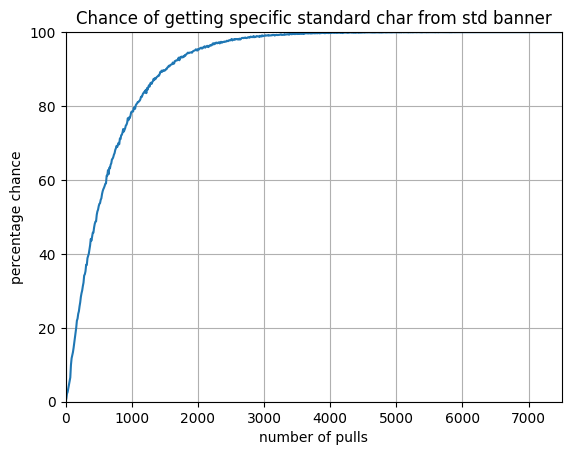

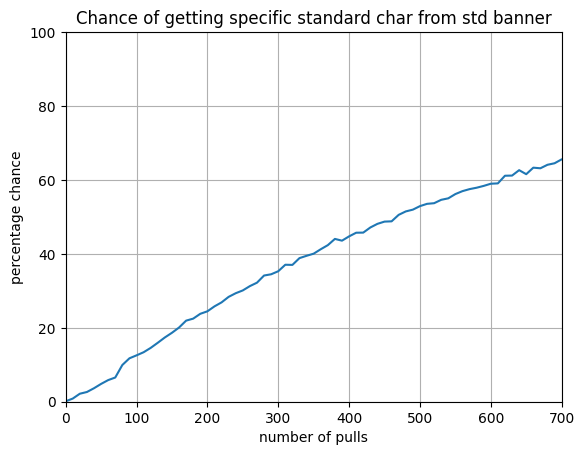

In [11]:
# plots full graph
plt.plot(attempt_vals, probabilities)
plt.title("Chance of getting specific standard char from std banner")
plt.xlabel("number of pulls")
plt.ylabel("percentage chance")
plt.xlim([0,7500])
plt.ylim([0,100])
plt.grid()
plt.show()

#plots zoomed in graph
plt.plot(attempt_vals, probabilities)
plt.title("Chance of getting specific standard char from std banner")
plt.xlabel("number of pulls")
plt.ylabel("percentage chance")
plt.xlim([0,700])
plt.ylim([0,100])
plt.grid()
plt.show()

In [32]:
# code to fill out table, finds closest number of pulls for a given probability
data = np.load("simulation_data_std_c.npy")
probabilities = np.array([attempt[0] for attempt in data])
attempt_vals = [attempt[1] for attempt in data]

prob_to_find = 99
prob_diffs = np.absolute(probabilities - prob_to_find)
index_found = prob_diffs.argmin()
print("num pulls: {}, probability: {}".format(attempt_vals[index_found], probabilities[index_found]))

num pulls: 80.0, probability: 9.9375


In [ ]:
# this cell has various calculations I did for standard deviation and the amount of time it will take to run the whole code

num_trials = int(1.6e4)   #1.6e4 results in a std of 0.102 for 6000 pulls
max_attempts = 6000
# simulate_trials(num_trials, max_attempts)
print(np.std([simulate_trials(num_trials, 6000) for i in range(30)]))

# times = [(individual_time * i/7500) for i in range(0,7500,10)]
# print(np.sum(times)/(3600))